In [91]:
import pandas as pd

# Load the combined data csv file
data = pd.read_csv('merged_data.csv')

# String columns are "country_iata", "airline_iata" and "airline_type"
# Replace columns with numeric values
data['country_iata'] = data['country_iata'].astype('category')
data['airline_type'] = data['airline_type'].astype('category')

# Replace columns with numeric values
data['country_iata'] = data['country_iata'].cat.codes
data['airline_type'] = data['airline_type'].cat.codes


In [92]:
airline = "BA"

# Filter the data to only include the airline we are interested in
data = data[data['airline_iata'] == airline]
# Drop the airline_iata column
data = data.drop('airline_iata', axis=1)
data = data.drop('country_iata', axis=1)
data = data.drop('date', axis=1)
# True if passenger_load_factor is greater than 50
data['large'] = data['passenger_load_factor_pct'] > 50
# Drop target column
data = data.drop('passenger_load_factor_pct', axis=1)

# Calculate large columns

data


,gdp,total_cases,total_deaths,stringency_index,reproduction_rate,population,population_density,seats,airline_type,large
25067,-20.991373,177543.0,38995.0,79.63,0.95,67508936.0,272.898,34622,4,False
25068,-20.991373,177543.0,38995.0,79.63,0.95,67508936.0,272.898,4895,4,False
25069,-20.991373,177543.0,38995.0,79.63,0.95,67508936.0,272.898,2880,4,False
25070,-20.991373,177543.0,38995.0,79.63,0.95,67508936.0,272.898,1223,4,False
25071,-20.991373,177543.0,38995.0,79.63,0.95,67508936.0,272.898,1485,4,False
...,...,...,...,...,...,...,...,...,...,...
25799,1.525013,9057629.0,168820.0,43.63,0.98,67508936.0,272.898,2760,4,True
25800,1.525013,9057629.0,168820.0,43.63,0.98,67508936.0,272.898,5133,4,True
25801,1.525013,9057629.0,168820.0,43.63,0.98,67508936.0,272.898,5305,4,True
25802,1.525013,9057629.0,168820.0,43.63,0.98,67508936.0,272.898,11160,4,True


[9.99869836e-01 9.58635987e-05]
[84065784.23202173   823141.31326824]


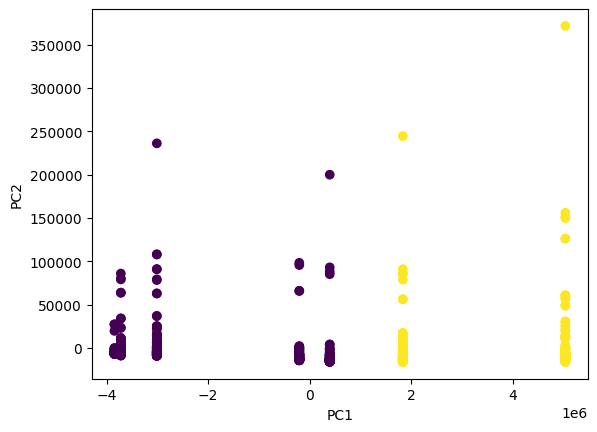

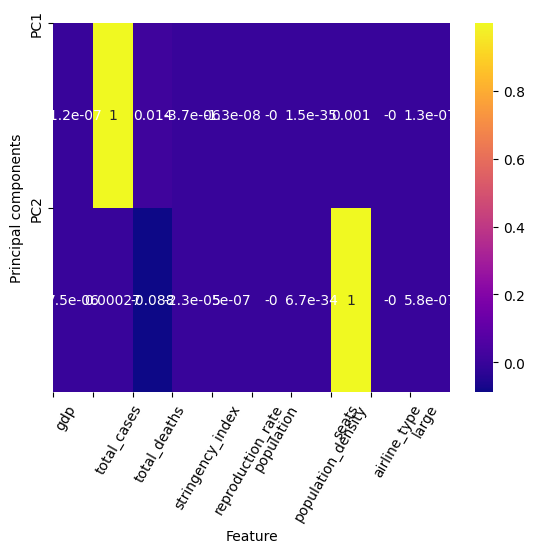

In [93]:
# Run PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca.fit(data)

# Transform the data
data_pca = pca.transform(data)

# Print eigenvalues
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# Plot the data colored by the large column
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['large'])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Viaualize the PCA as a heatmap
map = pd.DataFrame(pca.components_, columns=data.columns)
sns.heatmap(map, cmap='plasma')
